In [1]:
#Doing the weight conservation thing but it works this time.

#I want to look at the sum of probabilities that schmidt states are in an energy eigenstates. 
#I expect that it is conserved, but my gifs seems to be showing something different.
#correct that, we obviously dont have that the sum of weights is summed on a energie eigenstate, but maybe that the sum of weights, weighted by the schmidt value is.
#find a way to check that.

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import test
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full


In [2]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest



Text(0, 0.5, 'Eigenvalue Magnitude')

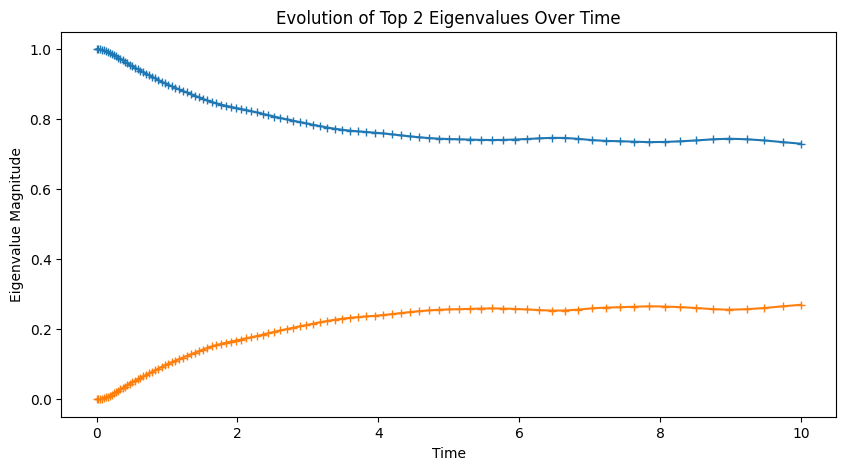

In [3]:
#testing new function

#need a plpot of schmidt value over time

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    ss, se, sv = compute_schmidt_states_new(result, idx)
    s_val_0.append(sv[0])
    s_val_1.append(sv[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_val_0, marker='+')
plt.plot(tlist,s_val_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')


In [4]:
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


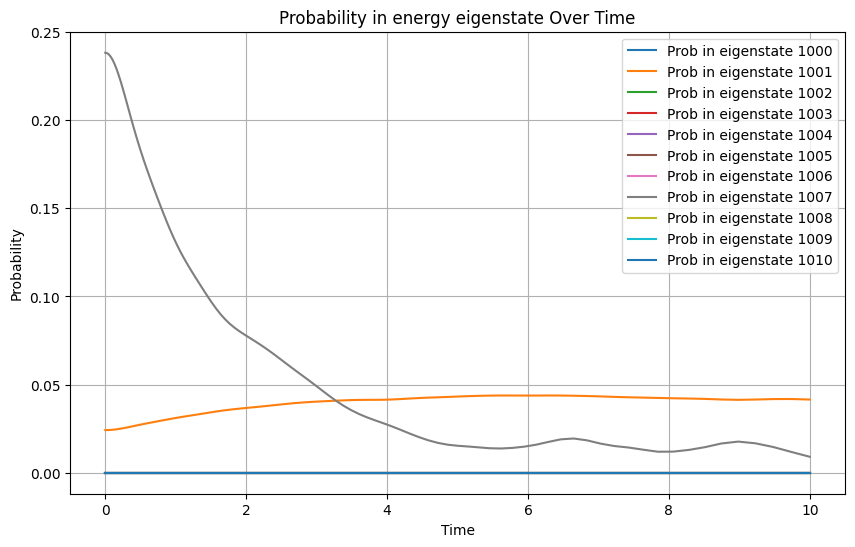

In [5]:
prob_list=[]
start_num = 1000
end_num = 1010

# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    _=[prob.append(abs(np.vdot(compute_schmidt_full(result,idx,1), eig)) ** 2) for idx in range(len(tlist))]
    prob_list.append(prob)
    print(i)
#    for idx in range(len(tlist)):
#        state = compute_schmidt_2(result,idx,2)
#        energy_coeff.append(abs(np.vdot(state.conjugate(), eig)) ** 2)


plt.figure(figsize=(10, 6))
for prob in prob_list:
    #result = np.multiply(energy_coeff, s_val_1)
    plt.plot(tlist, prob)#result

plt.title('Probability in energy eigenstate Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()